In [1]:
import os 
import sys
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from scipy.stats import gaussian_kde


C:\Users\cast6\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
from arcgis.features import GeoAccessor

In [123]:
#!{sys.executable} -m pip install geoplot

In [3]:
os.chdir("C:\DataScience_DSC_640\Weeks9-10\ex5-2")

In [4]:
geo_code = pd.read_csv("costcos-geocoded.csv")

In [5]:
geo_code.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [6]:
geo_code_california = geo_code[geo_code['State'] == 'California']

In [40]:
fig = px.density_mapbox(geo_code_california, lat='Latitude', lon='Longitude', 
                        mapbox_style="stamen-terrain",
                       title = 'Costco Stores Around the San Francisco Area')
 
fig

In [41]:
plot = px.density_contour(
     
    data_frame = geo_code_california,
    x='Longitude',
    y='Latitude',
    title = "Contour Map Of Costcos in California"

)

plot.show()

In [13]:
import geopandas
from shapely.geometry import Point


In [14]:
geo_code_al = geo_code[geo_code['State'] == 'Alabama']

In [15]:
gdf = geopandas.GeoDataFrame(
    geo_code_al, geometry=geopandas.points_from_xy(geo_code_al.Longitude, geo_code_al.Latitude))

In [16]:
gdf.head()

,Address,City,State,Zip Code,Latitude,Longitude,geometry
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955,POINT (-86.60096 34.74309)
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420,POINT (-86.81242 33.37765)
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884,POINT (-86.15088 32.36389)


In [257]:
#geo_code['Coordinates'] =  list(geo_code[['Latitude', 'Longitude']].itertuples(index=False, name= None))

In [256]:
#for i in range(len(geo_code['Coordinates'])):
    #geo_code['Coordinates'][i] = Point(geo_code['Coordinates'][i][0] , geo_code['Coordinates'][i][1])

In [255]:
#geo_code

In [253]:
#gdf = geopandas.GeoDataFrame(geo_code , geometry='Coordinates')

In [254]:
#gdf.head()

In [20]:
state_shp =  geopandas.read_file("tl_2017_us_state/tl_2017_us_state.shp")

<AxesSubplot:title={'center':'Costco Locations In Alabama'}, xlabel='Longitude', ylabel='Latitude'>

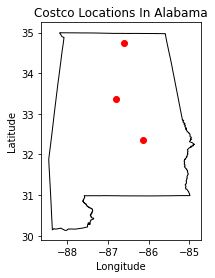

In [45]:



ax = state_shp[state_shp.NAME == 'Alabama'].plot(
    color='white', edgecolor='black')
plt.title("Costco Locations In Alabama")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
gdf.plot(ax=ax, color='red')





In [118]:
#GeoAccessor.from_xy(df, 'lon', 'lat').spatial.plot()

In [33]:
basket_ball_df = pd.read_csv("ppg2008.csv")

In [34]:
basket_ball_df.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


<AxesSubplot:title={'center':'Number of Games that Players Played'}, xlabel='G'>

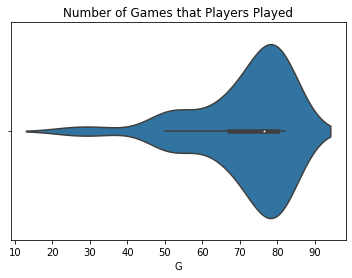

In [43]:
plt.title("Number of Games that Players Played")
sns.violinplot(x= basket_ball_df['G'])